# Instance vs Model Learning

Instance-based machine learning and model-based machine learning are two broad categories of machine learning algorithms that differ in their approach to learning and making predictions.

Instance-based learning algorithms, also known as lazy learning algorithms, do not build an explicit model from the training data. Instead, they store the entire training set and make predictions based on the similarity between new data points and the stored training data. Examples of instance-based learning algorithms include k-nearest neighbors, locally weighted learning, and instance-based learning algorithms.

Model-based learning algorithms, on the other hand, build an explicit model from the training data. This model can be used to make predictions on new data points. Examples of model-based learning algorithms include linear regression, logistic regression, and decision trees.

One of the key differences between instance-based and model-based learning algorithms is the way they handle unseen data. Instance-based learning algorithms make predictions based on the similarity between new data points and the stored training data. This means that they can make accurate predictions on unseen data, even if the data is not linearly separable. However, instance-based learning algorithms can be computationally expensive, especially when the training set is large.

Model-based learning algorithms, on the other hand, make predictions based on the model that has been built from the training data. This means that they can make accurate predictions on unseen data, even if the data is not linearly separable. However, model-based learning algorithms can be less accurate than instance-based learning algorithms on small training sets.

<div class="alert alert-block alert-info">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Linearly_separable_red-blue_cropped_.svg/1200px-Linearly_separable_red-blue_cropped_.svg.png" width=100 align=right>
<b>Note: </b>Linearly separable refers to a scenario in data classification where two sets of points in a feature space can be completely separated by a straight line (in 2D), a plane (in 3D), or a hyperplane in higher dimensions. Essentially, if you can draw a line (or its higher-dimensional analog) such that all points of one class fall on one side of the line and all points of the other class fall on the other side, those points are considered linearly separable.
</div>

Another key difference between instance-based and model-based learning algorithms is the way they handle noise in the training data. Instance-based learning algorithms are more robust to noise in the training data than model-based learning algorithms. This is because instance-based learning algorithms do not build an explicit model from the training data. Instead, they store the entire training set and make predictions based on the similarity between new data points and the stored training data. This means that they are less likely to be affected by noise.

Model-based learning algorithms, on the other hand, are less robust to noise. This is because model-based learning algorithms build an explicit model from the training data. This model can be affected by noise, which can lead to inaccurate predictions on new data points.

## An example instance approach predictor

To illustrate the above, let us build a simple instance based predictor - in this case, based on the California Housing dataset which can be found both on Keras and SKLearn. This predictor will attempt to "guess" the median house price for a given California district census block group.

Let us start by getting a sense of what the dataset is about.


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

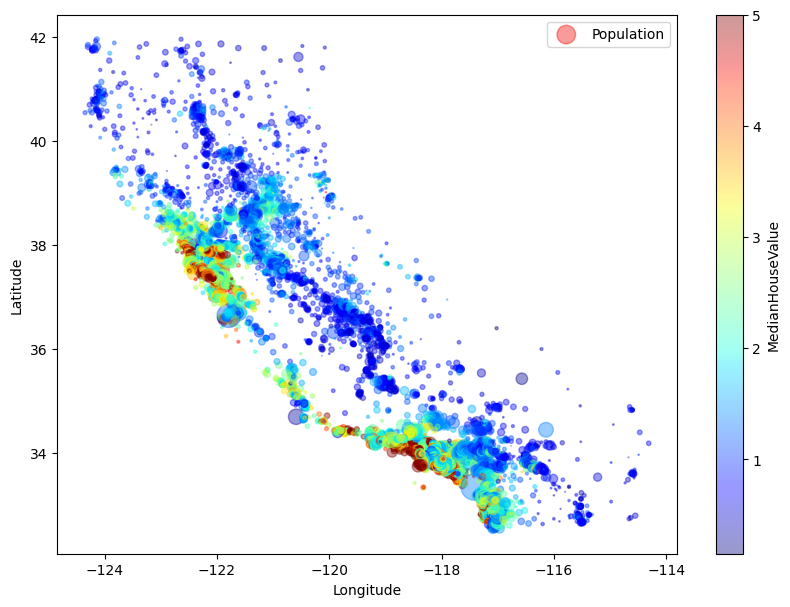

In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import pandas as pd


# Load the California housing dataset
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
print(housing.DESCR)
housing_df['MedianHouseValue'] = housing.target
housing_df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
                s=housing_df["Population"]/100, label="Population", figsize=(10,7),
                c="MedianHouseValue", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

And now that we have a reasonable idea of what data we are dealing with, let us define the predictor. In our case, we will be using a k-Nearest Neighbors regressor set for 10 neighbour groups.

<div class="alert alert-block alert-info">
<b>Note: </b> The k-nearest neighbors (k-NN) regressor is a straightforward  method used in machine learning for predicting the value of an unknown point based on the values of its nearest neighbors. Imagine you're at a park trying to guess the age of a tree you're standing next to but have no idea how to do it. What you can do, however, is look at the nearby trees whose ages you do know. You decide to consider the ages of the 3 trees closest to the one you're interested in. If those trees are 50, 55, and 60 years old, you might guess that the tree you're looking at is around 55 years old—the average age of its "nearest neighbors."
</div>

In [2]:


X, y = housing.data, housing.target

# Load and split the California housing dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Initialize the k-NN regressor
knn_reg = KNeighborsRegressor(n_neighbors=10)

# Train the k-NN model
knn_reg.fit(X_train_scaled, y_train)

# Evaluate the model
score = knn_reg.score(X_test_scaled, y_test)  # This returns the R^2 score of the prediction

# Making predictions
predictions = knn_reg.predict(X_test_scaled[:5])

# Calculate relative differences as percentages
relative_differences = ((predictions - y_test[:5]) / y_test[:5]) * 100

print(f"Model R^2 score: {score}")
print(f"Predictions for first 5 instances: {predictions}")
print(f"Actual values for first 5 instances: {y_test[:5]}")
print(f"Relative differences (%): {relative_differences}")


Model R^2 score: 0.6685552061947615
Predictions for first 5 instances: [0.5474   0.8863   4.297903 2.6508   2.4821  ]
Actual values for first 5 instances: [0.477   0.458   5.00001 2.186   2.78   ]
Relative differences (%): [ 14.75890985  93.51528384 -14.04211192  21.26258005 -10.71582734]


We can see that based on the above regressor, our $R^2$ is about 0.678. What this means is that 67% of the variance in the target variable can be explained by the features used in the model. In practical terms, this indicates a moderate to good fit, depending on the context and the complexity of the problem being modeled. However, it also means that 33% of the variance is not captured by the model, which could be due to various factors like missing important features, model underfitting, or the data inherently containing a significant amount of unexplainable variability.

## Solving the same problem with a model approach

Let's explore a model-based method for making predictions by utilizing a straightforward neural network structure. This network comprises two layers: the first is a dense layer with 50 neurons, designed to process input features and identify patterns through activation functions. The second layer is a singular neuron that outputs the predicted value. This setup forms the core of our predictive model, where the initial layer's neuron count aids in capturing the complexities of the input data, and the final single neuron consolidates this information into a single predictive output.

In [3]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with EarlyStopping
history = model.fit(X_train_scaled, y_train, epochs=50, verbose=0, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping])

# Evaluate the model on the test set
mse_test = model.evaluate(X_test_scaled, y_test)

# Make predictions
final_validation_loss = history.history['val_loss'][-1]
print(f"Final validation loss: {final_validation_loss}")
predictions = model.predict(X_test_scaled[:5]).flatten()

# Calculate relative differences as percentages
relative_differences = ((predictions - y_test[:5]) / y_test[:5]) * 100

print(f"Predictions for first 5 instances: {predictions}")
print(f"Actual values for first 5 instances: {y_test[:5]}")
print(f"Relative differences (%): {relative_differences}")


/Users/pedroleitao/.pyenv/versions/3.9.18/envs/tf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-08 10:06:46.961288: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-04-08 10:06:46.961306: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2024-04-08 10:06:46.961310: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2024-04-08 10:06:46.961326: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-08 10:06:46.961338: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3369
Final validation loss: 0.3279680609703064
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Predictions for first 5 instances: [0.4028629 1.2707397 3.897564  2.7003922 2.9025683]
Actual values for first 5 instances: [0.477   0.458   5.00001 2.186   2.78   ]
Relative differences (%): [-15.54236762 177.45407742 -22.04887722  23.5312098    4.4089331 ]


# Final remarks

In this experiment, we've explored two different ways to predict housing prices in California: using instance-based learning with a k-Nearest Neighbors (k-NN) regressor and model-based learning with a neural network. Here's a straightforward recap of what we learned:

- **Instance-Based Learning with k-NN**: This method relies on comparing new data points to existing ones to make predictions. It's pretty straightforward and works well for datasets where the relationship between data points is clear. Our k-NN model did a decent job, explaining about 68% of the variance in housing prices, showing it's a viable option but also highlighting some limits, especially when dealing with very large datasets.

- **Model-Based Learning with Neural Networks**: This approach creates a generalized model from the data it's trained on. Our simple neural network, equipped with early stopping to prevent overfitting, showcased the ability to capture complex patterns in the data. It requires a bit more setup and tuning but has the potential to tackle more complicated relationships in data.

Each method has its place, depending on the specific needs of your project and the characteristics of your dataset. Instance-based learning is great for simplicity and direct interpretations of data, while model-based learning can handle more complex patterns at the expense of needing more computational resources and tuning.

# Suggestions for Improvement

While we've covered the basics, here are a few ideas to take this experiment further:

- **Dive deeper into the data**: Understand which features most affect housing prices and why.
- **Tune the models**: Experiment with different settings and configurations to improve accuracy.
- **Compare more metrics**: Look beyond the $R^2$ score to other metrics like MAE or MSE for a fuller picture of model performance.
- **Explore model limitations**: Identify and address any shortcomings in the models used.

In essence, this exploration is a starting point. With more detailed analysis and optimization, there's potential to significantly enhance the predictions and insights derived from the California housing dataset.